In [195]:
import pickle
import pandas as pd
import numpy as np
import math
with open('/Users/gefan/Downloads/tfidf_df','rb') as handle1:
        tfidf_df = pickle.load(handle1)
with open('/Users/gefan/Downloads/tfidf_H4N_df','rb') as handle2:
        tfidf_H4N_df = pickle.load(handle2)
with open('/Users/gefan/Downloads/prop_df','rb') as handle3:
        prop_df = pickle.load(handle3)
with open('/Users/gefan/Downloads/prop_H4N_df','rb') as handle4:
        prop_H4N_df = pickle.load(handle4)
return_df = pd.read_csv('/Users/gefan/Downloads/return_data.csv')

In [196]:
tfidf_df.columns =  ['tic', 'date', 'proportion']
tfidf_H4N_df.columns =  ['tic', 'date', 'proportion']
prop_df.columns =  ['tic', 'date', 'proportion']
prop_H4N_df.columns =  ['tic', 'date', 'proportion']

tfidf_df = tfidf_df[tfidf_df['proportion']!=0]
tfidf_H4N_df = tfidf_H4N_df[tfidf_H4N_df['proportion']!=0]
prop_df= prop_df[prop_df['proportion']!=0]
prop_H4N_df = prop_H4N_df[prop_H4N_df['proportion']!=0]

In [197]:
tfidf_df = tfidf_df.merge(return_df, left_on = ['tic','date'], right_on = ['tic','datadate'], how = 'inner')
tfidf_H4N_df = tfidf_H4N_df.merge(return_df, left_on = ['tic','date'], right_on = ['tic','datadate'], how ='inner')
prop_df = prop_df.merge(return_df, left_on = ['tic','date'], right_on = ['tic','datadate'], how = 'inner')
prop_H4N_df = prop_H4N_df.merge(return_df, left_on = ['tic','date'], right_on = ['tic','datadate'], how ='inner')

In [198]:
tfidf_df=tfidf_df.sort_values(by=['proportion'])
tfidf_H4N_df=tfidf_H4N_df.sort_values(by=['proportion'])
tfidf_df.index = (range(len(tfidf_df)))
tfidf_H4N_df.index = (range(len(tfidf_H4N_df)))

prop_df=prop_df.sort_values(by=['proportion'])
prop_H4N_df=prop_H4N_df.sort_values(by=['proportion'])
prop_df.index = (range(len(prop_df)))
prop_H4N_df.index = (range(len(prop_H4N_df)))


In [200]:
start = 0
end = int(len(tfidf_df)/5)
Fin_q = ['low',2,3,4,'High']
H4N_q = ['low',2,3,4,'High']
Fin_ret = []
H4N_ret = []
for i in range(1,6):
    Fin_ret.append(tfidf_df.loc[start:end,'excess_return'].median())
    H4N_ret.append(tfidf_H4N_df.loc[start:end,'excess_return'].median())
    start+=int(len(tfidf_df)/5)
    end+=int(len(tfidf_df)/5)

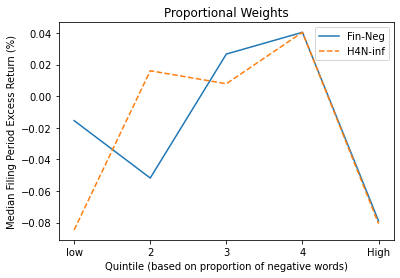

In [201]:
import matplotlib.pyplot as plt
plt.plot(Fin_q,[i*100 for i in Fin_ret],label = 'Fin-Neg')
plt.plot(H4N_q,[i*100 for i in H4N_ret],label = 'H4N-inf',linestyle = 'dashed')
plt.xlabel('Quintile (based on proportion of negative words)')
plt.ylabel('Median Filing Period Excess Return (%)')
plt.title('Proportional Weights')
plt.legend()
plt.show()

In [202]:
start = 0
end = int(len(prop_df)/5)
Fin_q = ['low',2,3,4,'High']
H4N_q = ['low',2,3,4,'High']
Fin_ret = []
H4N_ret = []
for i in range(1,6):
    Fin_ret.append(prop_df.loc[start:end,'excess_return'].median())
    H4N_ret.append(prop_H4N_df.loc[start:end,'excess_return'].median())
    start+=int(len(prop_df)/5)
    end+=int(len(prop_df)/5)

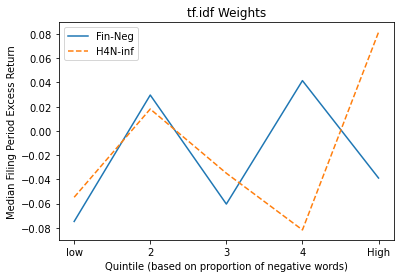

In [203]:
import matplotlib.pyplot as plt
plt.plot(Fin_q,[i*100 for i in Fin_ret],label = 'Fin-Neg')
plt.plot(H4N_q,[i*100 for i in H4N_ret],label = 'H4N-inf',linestyle = 'dashed')
plt.xlabel('Quintile (based on proportion of negative words)')
plt.ylabel('Median Filing Period Excess Return')
plt.title('tf.idf Weights')
plt.legend()
plt.show()